<a href="https://colab.research.google.com/github/nell78/wallmart_dataset_analysis/blob/main/notebook/wallmart_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"brisafragrante","key":"5f549ace7e08b259486848ba7573d6d7"}'}

# kaggle 폴더 생성 및 파일 이동

In [3]:
!ls -lha kaggle.json

!pip install -q kaggle # installing the kaggle package

!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed

!cp kaggle.json ~/.kaggle/ # move the key to the folder

!pwd # checking the present working directory

-rw-r--r-- 1 root root 70 Oct  1 09:45 kaggle.json
/content


In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# !kaggle datasets download -d <데이터셋-소유자>/<데이터셋-이름>
!kaggle datasets download -d devarajv88/walmart-sales-dataset

Dataset URL: https://www.kaggle.com/datasets/devarajv88/walmart-sales-dataset
License(s): other
  0% 0.00/4.80M [00:00<?, ?B/s]
100% 4.80M/4.80M [00:00<00:00, 94.6MB/s]


# 데이터 셋 압축풀기

In [6]:
import zipfile

with zipfile.ZipFile('walmart-sales-dataset.zip', 'r') as zip_ref:
  zip_ref.extractall('data')

In [7]:
import pandas as pd

# 데이터셋 로드
df = pd.read_csv('/content/data/walmart.csv')

# EDA
  - 구매금액과 사용자 성별 간의 관게
  - 구매금액과 결혼 상태 간의 관계
  

- 전체 데이터가 몇 개 있는 것인가?
- 몇 명의 User에 대한 정보가 있는 것인가? (`User_ID`의 개수)
- `Product_ID`의 수, `Gender`, `Occupation`, 'City_Category`... 각 컬럼의 값의 유일값, 분포
- 어떤 제품(`Product_ID`)가 제일 비쌀까? 그 제품은 어떤 카테고리인가?
- 가장 많이 팔린 제품은?
- Wallmart를 자주 찾는 사용자의 연령대는?
- Wallmart를 자주 찾는 사용자의 직업군은?

In [8]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB
None
(550068, 10)


# 분석

- 총 데이터셋은 550068이며, 결측값은 존재하지 않습니다.
- 수치형 데이터형은 User_ID, Occupation, Marial_Status, Produect_Category, Purchase이며,
- 범주형 데이터형은 Produect_ID, Gender, Age, City_Category, Stay_In_Current_City_Years 입니다.

In [9]:
df['User_ID'].nunique()

5891

# 분석

- User_ID는 5891입니다

In [10]:
df['Product_ID'].nunique()

3631

# 데이터의 분포 시각화하기

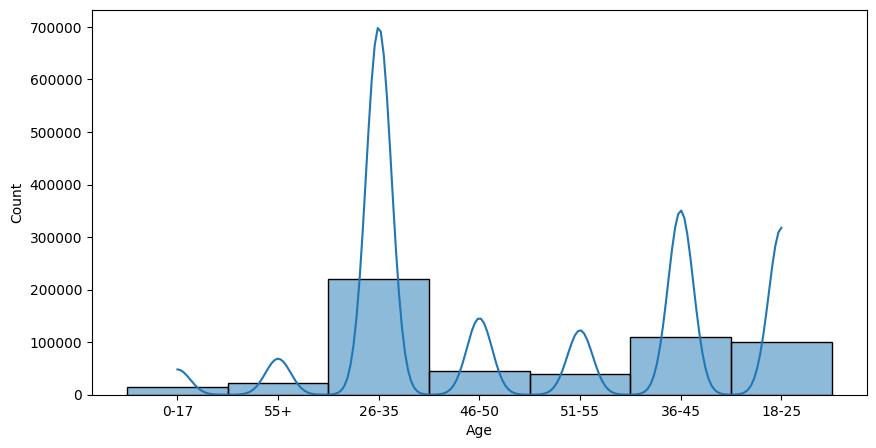

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], kde=True)
plt.show()

# 분석

- Age 변수를 분석한 결과, 26-35 나이대가 마트 사용률이 가장 많습니다.

In [12]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [13]:
df.groupby('Age')['Purchase'].sum().sort_values(ascending=False).head(10)

,Purchase
Age,
26-35,2031770578
36-45,1026569884
18-25,913848675
46-50,420843403
51-55,367099644
55+,200767375
0-17,134913183


# 분석

- 26-35세 총 구매액은 2031770578 입니다.

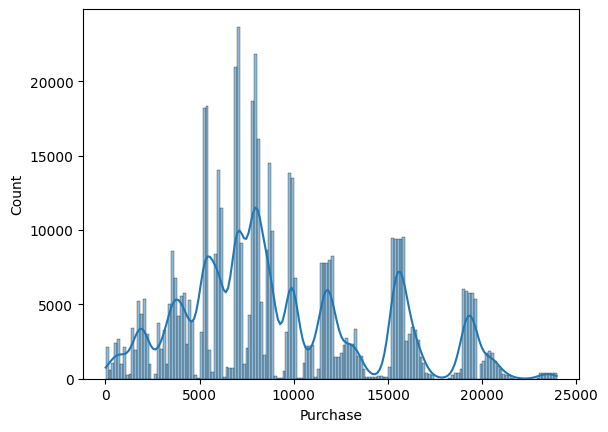

In [14]:
sns.histplot(df['Purchase'], kde=True)
plt.show()

# EDA

## 마트 이용자는 26~35세가 가장 많다

In [15]:
# 가장 많이 팔린 제품은?
df.groupby('Product_ID').size().sort_values(ascending=False).head(10)

,0
Product_ID,
P00265242,1880
P00025442,1615
P00110742,1612
P00112142,1562
P00057642,1470
P00184942,1440
P00046742,1438
P00058042,1422
P00145042,1406


In [16]:
# Wallmart를 자주 찾는 사용자의 직업군은?
df['Occupation'].value_counts()

,count
Occupation,
4,72308
0,69638
7,59133
1,47426
17,40043
20,33562
12,31179
14,27309
2,26588


In [17]:
df.groupby('Product_Category')['Purchase'].describe()[['count','mean']]

,count,mean
Product_Category,,
1,140378.0,13606.218596
2,23864.0,11251.935384
3,20213.0,10096.705734
4,11753.0,2329.659491
5,150933.0,6240.088178
6,20466.0,15838.478550
7,3721.0,16365.689600
8,113925.0,7498.958078
9,410.0,15537.375610


# plotly 정리

- scatter(산점도) : 데이터의 **분포**를 '점'으로 표시
  - `x축`:실수형, `y`축:실수형

- bar(막대) : 데이터의 크기를 막대의 길이로 표시
  - `x축`:범주형, `y`축:실수형
  - 범주형 데이터에 대해서는 **집계 연상(aggregation)**을 수행한 뒤 그래프를 그리도록 해야함
    - 예 : sum(), size(), mean()
- pie

In [18]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [19]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 30.6 MB/s eta 0:00:00


In [20]:
import plotly.express as px

# 잘못된 방법
# fig = px.bar(data_frame=df, x='Age', y='Purchase')
# fig.show()

# 'Age'별 평균 구매금액
age_grouped_df = df.groupby('Age')['Purchase'].mean().reset_index()

In [21]:
# 집계(mean()) 연산 진행한 데이터 프레임
fig = px.bar(data_frame=age_grouped_df, x='Age', y='Purchase')
fig.show()

In [22]:
# 그룹 연산을 두 개 이상의 컬럼에 대해 수행
grouped_df = df.groupby(['Gender', 'Age'])['Purchase'].mean().reset_index()
grouped_df

,Gender,Age,Purchase
0,F,0-17,8338.771985
1,F,18-25,8343.180201
2,F,26-35,8728.251754
3,F,36-45,8959.844056
4,F,46-50,8842.098947
5,F,51-55,9042.449666
6,F,55+,9007.036199
7,M,0-17,9235.173670
8,M,18-25,9440.942971
9,M,26-35,9410.337578


In [23]:
# 누적 막대그래프
fig = px.bar(data_frame=grouped_df, x='Age', y='Purchase', color='Gender')
fig.show()

In [24]:
# Gender 범주에 따라 막대를 별도로 표시
fig = px.bar(data_frame=grouped_df, x='Age', y='Purchase', color='Gender', barmode='group')
fig.show()

In [25]:
# 파이차트 : names(범주), values(실수)
# fig = px.pie(data_frame=grouped_df, names='Age', values='Purchase')
# fig.show()

fig = px.pie(data_frame=grouped_df, names='Gender', values='Purchase')
fig.show()

In [26]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(values=grouped_df['Purchase'], labels=grouped_df['Gender'])])
fig.show()

# 분석1 : 데이터 분석을 통한 마케팅 전략 제안
  - (목표) VIP 고객을 찾아서 **고객 맞춤 프로모션 제안**
  - [VIP 고객 선정 기준]
    - 고객의 구매금액 기준, 구매금액 합계가 가장 높은 Top10
    - 고객의 구매금액 기준, 구매금액 평균이 가장 높은 Top10
    - 고객의 구매 항목 개수 기준, 가장 많은 항목을 구매한 고객 Top10

- [VIP 고객 특징 분석]
  - VIP 고객들의 성별, 연령, 지역, 결혼 여부, 제품 품목에 대한 분석
  - 분석 결과를 바탕으로 고객 맞춤 프로모션 관련 제언

In [30]:
# VIP 고객선정 : 고객의 구매금액 기준, 구매금액 합계가 가장 높은 Top10
df.groupby('User_ID')['Purchase'].sum().sort_values(ascending=False)[:10].index

Index([1004277, 1001680, 1002909, 1001941, 1000424, 1004448, 1005831, 1001015,
       1003391, 1001181],
      dtype='int64', name='User_ID')

고객의 구매금액 기준, 구매금액 합계가 가장 높은 사용자를 구하기 위해, User_ID 기준으로 그룹 연산(groupby)을 수행하여, Purchase 컬럼의 합계(sum) 기준 내림차순하여 10명이 사용자를 추출하였습니다. 그 결과 선정된 VIP의 리스트는 다음과 같습니다.

 [1004277, 1001680, 1002909, 1001941, 1000424, 1004448, 1005831, 1001015,
       1003391, 1001181]

In [32]:
# VIP 고객선정 : 고객의 구매금액 기준, 구매금액 평균이 가장 높은 Top10

df.groupby('User_ID')['Purchase'].mean().sort_values(ascending=False)[:10].index

Index([1003902, 1005069, 1005999, 1001349, 1003461, 1000101, 1002983, 1005994,
       1000592, 1004474],
      dtype='int64', name='User_ID')

고객의 구매금액 기준, 구매금액 합계가 가장 높은 사용자를 구하기 위해, User_ID 기준으로 그룹 연산(groupby)을 수행하여, Purchase 컬럼의 평균(mean) 기준 내림차순하여 10명이 사용자를 추출하였습니다. 그 결과 선정된 VIP의 리스트는 다음과 같습니다.

[1003902, 1005069, 1005999, 1001349, 1003461, 1000101, 1002983, 1005994,
       1000592, 1004474]

In [38]:
# VIP 고객선정 : 고객의 구매 항목 개수 기준, 가장 많은 항목을 구매한 고객 Top10

df.groupby('User_ID')['Purchase'].size().sort_values(ascending=False)[:10].index

Index([1001680, 1004277, 1001941, 1001181, 1000889, 1003618, 1001150, 1001015,
       1005795, 1005831],
      dtype='int64', name='User_ID')

고객의 구매금액 기준, 구매금액 합계가 가장 높은 사용자를 구하기 위해, User_ID 기준으로 그룹 연산(groupby)을 수행하여, Purchase 컬럼의 개수(size) 기준 내림차순하여 10명이 사용자를 추출하였습니다. 그 결과 선정된 VIP의 리스트는 다음과 같습니다.

[1001680, 1004277, 1001941, 1001181, 1000889, 1003618, 1001150, 1001015,
       1005795, 1005831]

In [39]:
# vip 데이터 프레임 생성
vip1 = df.groupby('User_ID')['Purchase'].sum().sort_values(ascending=False)[:10].index.to_list()

vip2 = df.groupby('User_ID')['Purchase'].mean().sort_values(ascending=False)[:10].index.to_list()

vip3 = df.groupby('User_ID')['Purchase'].size().sort_values(ascending=False)[:10].index.to_list()

In [40]:
# vip 전체 리스트(중복 있을 수도 있음)
vip1 + vip2 + vip3

[1004277,
 1001680,
 1002909,
 1001941,
 1000424,
 1004448,
 1005831,
 1001015,
 1003391,
 1001181,
 1003902,
 1005069,
 1005999,
 1001349,
 1003461,
 1000101,
 1002983,
 1005994,
 1000592,
 1004474,
 1001680,
 1004277,
 1001941,
 1001181,
 1000889,
 1003618,
 1001150,
 1001015,
 1005795,
 1005831]

In [44]:
# df[df['User_ID'].isin(vip1 + vip2 + vip3)]

vip_df = df[df['User_ID'].isin(vip1 + vip2 + vip3)].copy()
vip_df.shape

(11331, 10)

User_ID 기준으로 VIP 조건을 만족하는 데이터만 추출하여 vip_df에 할당하였습니다.

## VIP 고객 특성 분석

In [50]:
vip_df.groupby(['User_ID', 'Gender']).size().reset_index()['Gender'].value_counts()

,count
Gender,
M,20
F,4


In [51]:
vip_df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [52]:
# vip_df.groupby(['User_ID', 'Occupation']).size().reset_index()['Gender'].value_counts

vip_df[vip_df['Gender']=='M'].sort_values(by='Purchase', ascending=False).head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
21457,1003391,P00159542,M,18-25,4,A,0,0,10,23883
356100,1000889,P00116142,M,46-50,20,A,1,0,10,23835
83368,1000889,P00087042,M,46-50,20,A,1,0,10,23795
271275,1005795,P00052842,M,26-35,1,A,1,1,10,23761
236111,1000424,P00116142,M,26-35,17,A,3,0,10,23733
470099,1000424,P00052842,M,26-35,17,A,3,0,10,23701
192977,1005795,P00087042,M,26-35,1,A,1,1,10,23631
166366,1001680,P00116142,M,26-35,20,A,3,1,10,23631
534362,1004277,P00052842,M,36-45,16,A,0,0,10,23615
392632,1000424,P00346542,M,26-35,17,A,3,0,10,23602


In [53]:
vip_df[vip_df['Gender']=='M'].sort_values(by='Purchase', ascending=False).head(10)[['Age', 'Occupation', 'Product_Category']]

,Age,Occupation,Product_Category
21457,18-25,4,10
356100,46-50,20,10
83368,46-50,20,10
271275,26-35,1,10
236111,26-35,17,10
470099,26-35,17,10
192977,26-35,1,10
166366,26-35,20,10
534362,36-45,16,10
392632,26-35,17,10


20대 후반-30대 초반의 사용자가 고액의 제품을 구매하였고, 이들은 모두 'A' 지역 출신임을 확인할 수 있다. 또한 직업은 20, 17번 카테고리를 갖는 경향이 있었으며, 해당 제품은 10번 카테고리였다. 추후 구매 가능성이 높은 **20대 ~ 30대 초반, A지역, 20, 17번 카테고리의 직업군**을 대상으로 프로모션을 진행하는 것을 제안한다.

2# 분석 2 : 지역별 소비 패턴 분석을 통한 제품 카테고리 제안
매장 담당자에게 각 지역별 매장 운영을 어떻게 하는 것이 효율적인지 제안을 하고자 합니다.

  - 각 지역별 판매 금액 합계, 사용자 수, 사용자의 연령, 직업, 결혼 여부 분석

  - 각 지역별 특징 도출

  - 각 지역별 소비 패턴 기반 매장 운영 방법 제언

In [54]:
df['City_Category'].value_counts()

,count
City_Category,
B,231173
C,171175
A,147720


데이터에 포함된 지역은 A, B, C의 세 개의 지역이 존재합니다.각 지역에 구매 이력 데이터는 각각 약 15만건, 23만건, 17만건이 존재합니다. 각 지역별 사용자, 구매금액, 합계를 살펴보겠습니다.

In [55]:
# 각 지역별 구매금액 합계
df.groupby('City_Category')['Purchase'].sum()

,Purchase
City_Category,
A,1316471661
B,2115533605
C,1663807476


각 지역별 구매금액의 합계는 각 지역별 구매내역의 개수와 비례하여 발생한 것을 확인할 수 있습니다. 즉 B지역의 구매금액 합계가 가장 크고, A지역의 구매금액 합계가 가장 낮았습니다.

In [58]:
# 각 지역별 사용자의 수
df[['User_ID', 'City_Category']].drop_duplicates()['City_Category'].value_counts()

,count
City_Category,
C,3139
B,1707
A,1045


각 지역별 사용자 수는 C, B, A 순으로 지역별 구매금액 합계나 구매 건수와는 무관한 것으로 확인되었습니다.

<Axes: xlabel='count', ylabel='City_Category'>

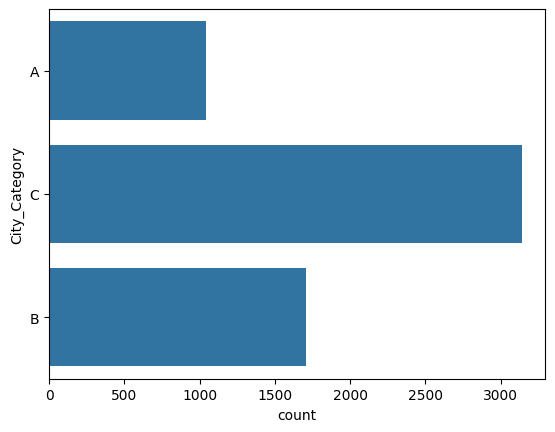

In [60]:
import seaborn as sns

sns.countplot(df[['User_ID', 'City_Category']].drop_duplicates()['City_Category'])

In [61]:
# 사용자 정보와 무관한 제품정보('Product_ID', 'Product_Category', 'Purchase')
user_df = df.drop(columns=['Product_ID', 'Product_Category', 'Purchase']).drop_duplicates().copy()

user_df.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1000001,F,0-17,10,A,2,0
4,1000002,M,55+,16,C,4+,0
5,1000003,M,26-35,15,A,3,0
6,1000004,M,46-50,7,B,2,1
9,1000005,M,26-35,20,A,1,1


In [62]:
user_df.groupby(['City_Category', 'Gender']).count()

User_ID   Age  Occupation  Stay_In_Current_City_Years  \
City_Category Gender                                                          
A             F           295   295         295                         295   
              M           750   750         750                         750   
B             F           503   503         503                         503   
              M          1204  1204        1204                        1204   
C             F           868   868         868                         868   
              M          2271  2271        2271                        2271   

                      Marital_Status  
City_Category Gender                  
A             F                  295  
              M                  750  
B             F                  503  
              M                 1204  
C             F                  868  
              M                 2271